# 1.隐马尔可夫模型的定义 

   隐马尔可夫模型是关于时序的概率模型，描述由一个隐藏的马尔可夫链随机生成不可观测的状态随机序列，再由各个状态生成一个观测而产生观测随机序列的过程。隐藏的马尔可夫链随机生成的状态的序列，称为状态序列（state sequence);每个状态生成一个观测，而由此产生的观测的随机序列，称为观测序列（observation sequence)。序列的每一个位置又可以看作是一个时刻。
   设Q是所有可能的状态的集合，V是所有可能的观测的集合。
</br>
</br>

<font size = 6 ,face="黑体">$$ Q=(q_{1},q_{2},\ldots,q_{N}),\quad V=(v_{1},v_{2},\ldots,v_{M})$$  </font>
</br>
</br>

其中，N是可能的状态数，M是可能的观测数。

状态q是不可见的，观测v是可见的。应用到词性标注系统，词就是v，词性就是q。

I是长度为T的状态序列，O是对应的观测序列。

</br>
</br>
</br>
<font size = 6 ,face="黑体">$$ I=(i_{1},i_{2},\ldots,i_{T}),\quad O=(o_{1},o_{2},\ldots,o_{T})$$</font>
</br>
</br>
</br>

这可以想象为相当于给定了一个词（O）+词性（I）的训练集，于是我们手上有了一个可以用隐马尔可夫模型解决的实际问题。

定义A为状态转移概率矩阵：

$$A=\begin{bmatrix}
   a_{ij}
  \end{bmatrix} _{N\times N}\tag{1}   $$

其中，

$$a_{ij}=P(i_{t+1}=q_j|i_t=q_i),\quad i=1,2,\ldots,N;\ j=1,2,\ldots,N   $$

是在时刻t处于状态$q_i$的条件下在时刻t+1转移到状态$q_j$的概率。

这实际在表述一个__一阶__的HMM，所作的假设是每个状态只跟前一个状态有关。

B是观测概率矩阵:

$$B=\begin{bmatrix}
   b_{i}(k)
  \end{bmatrix} _{N\times M}\tag{2}$$


其中，

$$b_{j}(k)=P(o_{t}=v_k|i_t=q_j),\quad k=1,2,\ldots,M;\ j=1,2,\ldots,N   $$



是在时刻t处于状态qj的条件下生成观测vk的概率（也就是所谓的“发射概率”），
这实际上在作另一个假设，观测是由当前时刻的状态决定的，跟其他因素无关。

π是初始状态概率向量：



$$\pi = (\pi_{i})\tag{3}$$

其中，

$$\pi_{i}=P(i_{1}=q_i),\quad  i=1,2,\ldots,N$$

是时刻t=1处于状态$q_j$的概率。

隐马尔可夫模型由初始状态概率向量$\pi$、状态转移概率矩阵$A$和观测概率矩阵$B$决定。$\pi$和$A$决定状态序列，$B$决定观测序列。因此，隐马尔可夫模型$\lambda$可以用三元符号表示，即


$$\lambda = \left(\pi,A,B\right)\tag{*}$$

$\pi$,$A$,$B$称为隐马尔可夫模型的三要素。如果加上一个具体的状态集合$Q$和观测序列$V$，则构成了HMM的五元组。

从定义可知，隐马尔可夫模型作了两个基本假设：

(1)齐次马尔可夫性假设，即假设隐藏的马尔可夫链在任意时刻t的状态只依赖于其前一时刻的状态，与其他时刻的状态及观测无关。



$$P(i_t|i_{t-1},o_{t-1},\ldots,i_1,o_1) = P(i_t|i_{t-1}),\quad t = 1,2,\ldots,T$$


从上式左右两边的复杂程度来看，齐次马尔可夫性假设简化了许多计算。


(2)观测独立性假设，即假设任意时刻的观测只依赖于该时刻的马尔可夫链的状态，与其他观测及状态无关。



$$
P(o_t|i_{T},o_{T},o_{T-1},i_{T-1},\ldots i_{1},o_1) = P(o_t|i_{t})
$$


依然是一个简化运算的假设。

# 2.隐马尔可夫模型的实例

假设有一村，村民只有两种病情：要么健康，要么发烧,但村民不确定自己到底是哪种状态，只能回答感觉正常、头晕或冷。医生说其实感冒这种病，只跟病人前一天的病情有关，并且当天的病情决定当天的身体感觉。
隐马尔可夫模型的两个基本假设满足，统计了一下病历卡上的数据。

In [10]:
states = ('Healthy', 'Fever')
 
observations = ('normal', 'cold', 'dizzy')
 
start_probability = {'Healthy': 0.6, 'Fever': 0.4}
 
transition_probability = {
    'Healthy': {'Healthy': 0.7, 'Fever': 0.3},
    'Fever': {'Healthy': 0.4, 'Fever': 0.6},
}
 
emission_probability = {
    'Healthy': {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever': {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
}

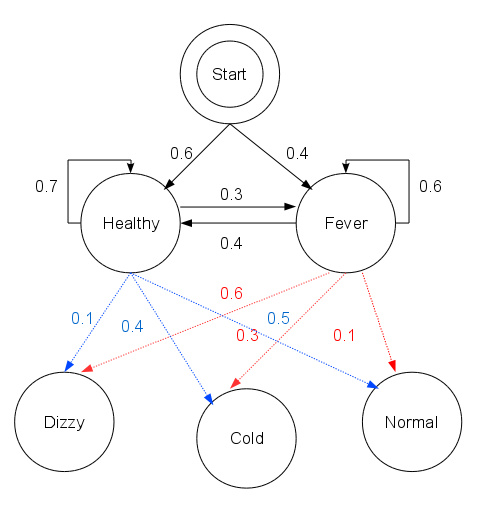

states代表病情，observations表示最近三天观察到的身体感受，start_probability代表病情的分布，transition_probability是病情到病情的转移概率，emission_probability则是病情表现出身体状况的发射概率。隐马的五元组都齐了。

In [21]:
import numpy as np
class HMM:
    """
    Order 1 Hidden Markov Model
 
    Attributes
    ----------
    A : numpy.ndarray
        State transition probability matrix
    B: numpy.ndarray
        Output emission probability matrix with shape(N, number of output types)
    pi: numpy.ndarray
        Initial state probablity vector
    """
 
    def __init__(self, A, B, pi):
        self.A = A
        self.B = B
        self.pi = pi
    def generate_index_map(lables):
        index_label = {}
        label_index = {}
        i = 0
        for l in lables:
            index_label[i] = l
            label_index[l] = i
            i += 1
        return label_index, index_label
 
 
    states_label_index, states_index_label = generate_index_map(states)
    observations_label_index, observations_index_label = generate_index_map(observations)

 
    def convert_observations_to_index(observations, label_index):
        list = []
        for o in observations:
            list.append(label_index[o])
        return list

 
    def convert_map_to_vector(map, label_index):
        v = np.empty(len(map), dtype=float)
        for e in map:
            v[label_index[e]] = map[e]
        return v
 
 
    def convert_map_to_matrix(map, label_index1, label_index2):
        m = np.empty((len(label_index1), len(label_index2)), dtype=float)
        for line in map:
            for col in map[line]:
                m[label_index1[line]][label_index2[col]] = map[line][col]
        return m
 
 


In [24]:
A = convert_map_to_matrix(transition_probability, states_label_index, states_label_index)
print("状态转移概率:")
print(A)
B = convert_map_to_matrix(emission_probability, states_label_index, observations_label_index)
print("观测概率（发射）:")
print(B)
observations_index = convert_observations_to_index(observations, observations_label_index)
pi = convert_map_to_vector(start_probability, states_label_index)
print("初始状态概率:")
print(pi)

状态转移概率:
[[ 0.7  0.3]
 [ 0.4  0.6]]
观测概率（发射）:
[[ 0.5  0.4  0.1]
 [ 0.1  0.3  0.6]]
初始状态概率:
[ 0.6  0.4]


## 观测序列的生成过程

根据隐马尔可夫模型定义，可以将一个长度为$T$的观测序列$O = (o_1,o_2,o_3,\ldots,o_T)$的生成过程描述如下：

算法(观测序列的生成）

输入：隐马尔可夫模型$\lambda = \left(\pi,A,B\right)$，观测序列长度$T$

输出：观测序列$O = (o_1,o_2,o_3,\ldots,o_T)$

(1)按照初始状态分布$\pi$ 产生状态$i_1$

(2)令$t=1$

(3)按照状态$i_1$的观测概率分布b_i_t(k)生成$o_t$

(4)按照状态$i_1$的状态转移概率分布$ \{ a_{i_{t}i_{t+1} } \}$产生状态$i_{t+1},i_{t+1}=1,2,\dots,N$

令$t=t+1$；如果$t<T$则转步(3)；否则，终止。

## 观测序列生成Python实现

In [64]:
class HMM:
    """
    Order 1 Hidden Markov Model
 
    Attributes
    ----------
    A : numpy.ndarray
        State transition probability matrix
    B: numpy.ndarray
        Output emission probability matrix with shape(N, number of output types)
    pi: numpy.ndarray
        Initial state probablity vector
    """
 
    def __init__(self, A, B, pi):
        self.A = A
        self.B = B
        self.pi = pi
    def generate_index_map(lables):
        index_label = {}
        label_index = {}
        i = 0
        for l in lables:
            index_label[i] = l
            label_index[l] = i
            i += 1
        return label_index, index_label
 
 
    states_label_index, states_index_label = generate_index_map(states)
    observations_label_index, observations_index_label = generate_index_map(observations)

 
    def convert_observations_to_index(observations, label_index):
        list = []
        for o in observations:
            list.append(label_index[o])
        return list

 
    def convert_map_to_vector(map, label_index):
        v = np.empty(len(map), dtype=float)
        for e in map:
            v[label_index[e]] = map[e]
        return v
 
 
    def convert_map_to_matrix(map, label_index1, label_index2):
        m = np.empty((len(label_index1), len(label_index2)), dtype=float)
        for line in map:
            for col in map[line]:
                m[label_index1[line]][label_index2[col]] = map[line][col]
        return m
 
 

    def simulate(self, T):

        def draw_from(probs):
            return np.where(np.random.multinomial(1,probs) == 1)[0][0]

        observations = np.zeros(T, dtype=int)
        states = np.zeros(T, dtype=int)
        states[0] = draw_from(self.pi)
        observations[0] = draw_from(self.B[states[0],:])
        for t in range(1, T):
            states[t] = draw_from(self.A[states[t-1],:])
            observations[t] = draw_from(self.B[states[t],:])
        return observations,states
    
    def _forward(self, obs_seq):
        N = self.A.shape[0]
        T = len(obs_seq)

        F = np.zeros((N,T))
        F[:,0] = self.pi * self.B[:, obs_seq[0]]

        for t in range(1, T):
            for n in range(N):
                F[n,t] = np.dot(F[:,t-1], (self.A[:,n])) * self.B[n, obs_seq[t]]

        return F
    
    def _backward(self, obs_seq):
        N = self.A.shape[0]
        T = len(obs_seq)

        X = np.zeros((N,T))
        X[:,-1:] = 1

        for t in reversed(range(T-1)):
            for n in range(N):
                X[n,t] = np.sum(X[:,t+1] * self.A[n,:] * self.B[:, obs_seq[t+1]])

        return X

    def baum_welch_train(self, observations, criterion=0.05):
        n_states = self.A.shape[0]
        n_samples = len(observations)
 
        done = False
        while not done:
            # alpha_t(i) = P(O_1 O_2 ... O_t, q_t = S_i | hmm)
            # Initialize alpha
            alpha = self._forward(observations)

            # beta_t(i) = P(O_t+1 O_t+2 ... O_T | q_t = S_i , hmm)
            # Initialize beta
            beta = self._backward(observations)

            xi = np.zeros((n_states,n_states,n_samples-1))
            for t in range(n_samples-1):
                denom = np.dot(np.dot(alpha[:,t].T, self.A) * self.B[:,observations[t+1]].T, beta[:,t+1])
                for i in range(n_states):
                    numer = alpha[i,t] * self.A[i,:] * self.B[:,observations[t+1]].T * beta[:,t+1].T
                    xi[i,:,t] = numer / denom

            # gamma_t(i) = P(q_t = S_i | O, hmm)
            gamma = np.sum(xi,axis=1)
            # Need final gamma element for new B
            prod =  (alpha[:,n_samples-1] * beta[:,n_samples-1]).reshape((-1,1))
            gamma = np.hstack((gamma,  prod / np.sum(prod))) #append one more to gamma!!!

            newpi = gamma[:,0]
            newA = np.sum(xi,2) / np.sum(gamma[:,:-1],axis=1).reshape((-1,1))
            newB = np.copy(self.B)

            num_levels = self.B.shape[1]
            sumgamma = np.sum(gamma,axis=1)
            for lev in range(num_levels):
                mask = observations == lev
                newB[:,lev] = np.sum(gamma[:,mask],axis=1) / sumgamma

            if np.max(abs(self.pi - newpi)) < criterion and \
                            np.max(abs(self.A - newA)) < criterion and \
                            np.max(abs(self.B - newB)) < criterion:
                done = 1

            self.A[:],self.B[:],self.pi[:] = newA,newB,newpi
    def viterbi(self, obs_seq):
        """
        Returns
        -------
        V : numpy.ndarray
            V [s][t] = Maximum probability of an observation sequence ending
                       at time 't' with final state 's'
        prev : numpy.ndarray
            Contains a pointer to the previous state at t-1 that maximizes
            V[state][t]
        """
        N = self.A.shape[0]
        T = len(obs_seq)
        prev = np.zeros((T - 1, N), dtype=int)

        # DP matrix containing max likelihood of state at a given time
        V = np.zeros((N, T))
        V[:,0] = self.pi * self.B[:,obs_seq[0]]

        for t in range(1, T):
            for n in range(N):
                seq_probs = V[:,t-1] * self.A[:,n] * self.B[n, obs_seq[t]]
                prev[t-1,n] = np.argmax(seq_probs)
                V[n,t] = np.max(seq_probs)

        return V, prev
    def build_viterbi_path(self, prev, last_state):
        """Returns a state path ending in last_state in reverse order."""
        T = len(prev)
        yield(last_state)
        for i in range(T-1, -1, -1):
            yield(prev[i, last_state])
            last_state = prev[i, last_state]
    def state_path(self, obs_seq):
        """
        Returns
        -------
        V[last_state, -1] : float
            Probability of the optimal state path
        path : list(int)
            Optimal state path for the observation sequence
        """
        V, prev = self.viterbi(obs_seq)

        # Build state path with greatest probability
        last_state = np.argmax(V[:,-1])
        path = list(self.build_viterbi_path(prev, last_state))

        return V[last_state,-1], reversed(path)


draw_from接受一个概率分布，然后生成该分布下的一个样本。算法首先初始化两个长度为T的向量，接着按照初始状态分布pi生成第一个状态
有了状态，我们还可以取出状态对应的观测的概率分布，生成一个观测
接下来一直到t，我们都是按前一个状态取出状态转移概率分布，生成状态，再取出状态对应的观测的概率分布，生成一个观测。重复这个步骤，就得到了长度为T的观测和状态向量了。

In [30]:
h = HMM(A,B,pi)
observations_data, states_data = h.simulate(10)
print(observations_data)
print (states_data)##下标

[1 0 0 0 1 1 1 2 0 0]
[0 0 0 0 0 0 1 1 0 0]


## 隐马尔可夫模型的3个基本问題

隐马尔可夫模型有3个基本问题：

(1)   概率计算问题。给定模型$\lambda = \left(\pi,A,B\right)$和观测序列$O = (o_1,o_2,o_3,\ldots,o_T)$,计算在模型$\lambda$下观测序列$O$出现的概率$P(O|\lambda)$。

(2)   学习问题。己知观测序列$O = (o_1,o_2,o_3,\ldots,o_T)$,估计模型$\lambda = \left(\pi,A,B\right)$参数，使得在该模型下观测序列$P(O|\lambda)$概率最大。即用极大似然估计的方法估计参数。

(3)   预测问题，也称为解码（decoding)问题。已知模型$\lambda = \left(\pi,A,B\right)$和观测序列$O = (o_1,o_2,o_3,\ldots,o_T)$，求对给定观测序列条件概率$P(O|\lambda)$最大的状态序列$I=(i_1,i_2,\dots,i_T)$。即给定观测序列，求最有可能的对应的状态序列。

下面各节将逐一介绍这些基本问题的解法。

### 概率计算算法

这节介绍计算观测序列概率的前向（forward)与后向（backward)算法，以及概念上可行但计算上不可行的直接计算法（枚举）。前向后向算法无非就是求第一个状态的前向概率或最后一个状态的后向概率，然后向后或向前递推即可。

### 直接计算法

给定模型，求给定长度为T的观测序列的概率，直接计算法的思路是枚举所有的长度T的状态序列，计算该状态序列与观测序列的联合概率（隐状态发射到观测），对所有的枚举项求和即可。在状态种类为$N$的情况下，一共有$N^T$种排列组合，每种组合计算联合概率的计算量为$T$，总的复杂度为$O(TN^T)$，并不可取。

### 前向算法

首先定义前向概率。

定义(前向概率）给定隐马尔可夫模型$\lambda$，定义到时刻$t$为止的观测序列为$o_1,o_2,\dots,o_t$且状态为q_t的概率为前向概率，记作
   
   
   $$ \alpha_t(i) = P(o_1,o_2,\dots,o_t,i_t=q_i|\lambda)$$
  
可以递推地求得前向概率$\alpha_t(i)$ 及观测序列概率$P(O|\lambda)$。   

### 算法(观测序列概率的前向算法）

输入：隐马尔可夫模型$\lambda$，观测序列$O$;

输出：观测序列概率$P(O|\lambda)$

(1)初值

$$\alpha_1(i)=\pi_i b_i(o_i),\quad i=1,2,\dots,N$$

前向概率的定义中一共限定了两个条件，一是到当前为止的观测序列，另一个是当前的状态。所以初值的计算也有两项（观测和状态），一项是初始状态概率，另一项是发射到当前观测的概率。

(2)递推对$t = 1,2,\dots,T-1$,
$$ \alpha_{t+1}(i)=\left[ \sum_{j=0}^{N} \alpha_{t}(j)a_{ji}\right]b_i(o_{t+1}),\quad i=1,2,\dots,N $$

每次递推同样由两部分构成，大括号中是当前状态为$i$且观测序列的前$t$个符合要求的概率，括号外的是状态i发射观测$t+1$的概率。

(3)终止
$$ P(O|\lambda)=  \sum_{i=1}^{N} \alpha_T(i)$$

由于到了时间$T$，一共有N种状态发射了最后那个观测，所以最终的结果要将这些概率加起来。
由于每次递推都是在前一次的基础上进行的，所以降低了复杂度。准确来说，其计算过程如下图所示：
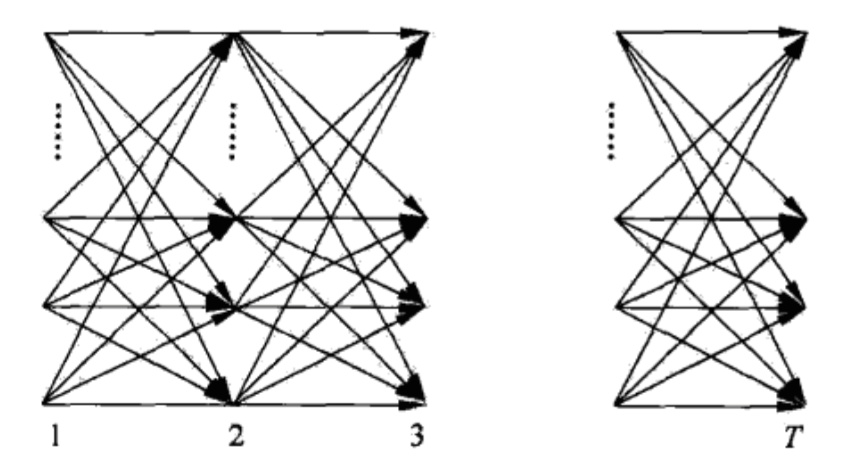

下方标号表示时间节点，每个时间点都有N种状态，所以相邻两个时间之间的递推消耗$N^2$次计算。而每次递推都是在前一次的基础上做的，所以只需累加$O(T)$次，所以总体复杂度是$O(T)$个$N^2$，即$O(N^2T)$。

## 前向算法Python实现

In [41]:
def _forward(self, obs_seq):
    N = self.A.shape[0]
    T = len(obs_seq)
 
    F = np.zeros((N,T))
    F[:,0] = self.pi * self.B[:, obs_seq[0]]
 
    for t in range(1, T):
        for n in range(N):
            F[n,t] = np.dot(F[:,t-1], (self.A[:,n])) * self.B[n, obs_seq[t]]
 
    return F

代码和伪码的对应关系还是很清晰的，F对应$\alpha$，HMM的三个参数与伪码一致。

### 后向算法

__定义(后向概率）__给定隐马尔可夫模型$\lambda$,定义在时刻$t$状态为$q_i$的条件下，从$t+1$到$T$的部分观测序列为$o_{i+1},o_i{t+2},o_{T}$的概率为后向概率，记作


$$ \beta_t(i)=P(o_{t+1},o_{t+2},\dots,o_T|i_t=q_i,\lambda)$$

可以用递推的方法求得后向概率$\beta_t(i)$及观测序列$P(O|\lambda)$。

### 算法(观测序列概率的后向算法）

输入：隐马尔可夫模型$\lambda$,观测序列$O$:

输出：观测序列概率$P(O|\lambda)$

(1)初值

$$\beta_T(i)=1,i=1,2,\dots,N$$
(2)对$t=T-1,T-2,\dots,1$
$$\beta_t(i)=\sum_{j=1}^{N}a_{ij}b_j(o_{t+1})\beta_{t+1}(j),\quad i=1,2,\dots,N $$
$a_{ij}$表示状态i转移到$j$的概率，$b_j$表示发射$O_{t+1}$,$\beta_{t+1}(j)$表示$j$后面的序列对应的后向概率。

(3)
$$P(O|\lambda) = \sum_{i=1}^{N}\pi_{i}b_i(o_1)\beta_1(i)$$

最后的求和是因为，在第一个时间点上有N种后向概率都能输出从2到$T$的观测序列，所以乘上输出$O_1$的概率后求和得到最终结果。

## 后向算法的Python实现

In [42]:
def _backward(self, obs_seq):
    N = self.A.shape[0]
    T = len(obs_seq)
 
    X = np.zeros((N,T))
    X[:,-1:] = 1
 
    for t in reversed(range(T-1)):
        for n in range(N):
            X[n,t] = np.sum(X[:,t+1] * self.A[n,:] * self.B[:, obs_seq[t+1]])
 
    return X

## 学习算法

隐马尔可夫模型的学习，根据训练数据是包括观测序列和对应的状态序列还是只有观测序列，可以分别由监督学习与非监督学习实现。本节首先介绍监督学习算法，而后介绍非监督学习算法——Baum-Weich算法（也就是EM算法)。

### 监督学习方法

假设已给训练数据包含S个长度相同的观测序列和对应的状态序列$\{(O_1,I_1),(O_2,I_2),\dots,(O_S,I_S)\}$，那么可以利用极大似然估计法来估计隐马尔可夫模型的参数。具体方法如下。

1.转移概率$a_{ij}$的估计
设样本中时刻t处于状态i时刻$t+1$转移到状态$j$的频数为$A_{ij}$，那么状态转移概率$a_{ij}$的估计是
$$\hat{a}_{ij}=\frac{A_{ij}}{{\sum_{j=1}^{N}}A_{ij}},\quad i=1,2,\dots,N; j=1,2,\dots,N  $$
很简单的最大似然估计。

2.观测概率的估计
设样本中状态为j并观测为$k$的频数是$B_{jk}$，那么状态为$j$观测为$k$的概率的估计是
$$\hat{b}_{i}(k)=\frac{B_{jk}}{\sum_{k=1}^{M}B_{jk}},\quad j=1,2,\dots,N; k=1,2,\dots,M  $$

3.初始状态概率$\pi_i$的估计$\hat{\pi_i}$为$S$个样本中初始状态为$q_i$的频率。

由于监督学习需要使用训练数据，而人工标注训练数据往往代价很高，有时就会利用非监督学习的方法。

## Baum-Welch算法

假设给定训练数据只包含$S$个长度为$T$的观测序列$\{O_1,O_2,\quad,O_S\}$而没有对应的状态序列，目标是学习隐马尔可夫模型$\lambda = \left(\pi,A,B\right)$的参数。我们将观测序列数据看作观测数据$O$，状态序列数据看作不可观测的隐数据$I$，那么隐马尔可夫模型事实上是一个含有隐变量的概率模型

$$P(O|\lambda)=\sum_I P(O|I,\lambda)P(I|\lambda)$$

它的参数学习可以由EM算法实现。

1 确定完全数据的对数似然函数
所有观测数据写成$O=(o_1,o_2,\dots,o_T)$,所有隐数据写成$I=(i_1,i_2,\dots,i_T)$，完全数据是$(O,I)=(o_1,o_2,\dots,o_T,i_1,i_2,\dots,i_T)$。完全数据的对数似然函数是
$log P(O,I|\lambda)$

2 EM算法的E步：求$Q$函数$Q(\lambda,\bar{\lambda})$

$$Q(\lambda,\bar{\lambda}) = \sum_I log P(O,I|\lambda)P(O,I|\bar{\lambda})$$

其中，$\bar{\lambda}$是隐马尔可夫模型参数的当前估计值，$\lambda$是要极大化的隐马尔可夫模型参数。（$Q$函数的标准定义是：$Q(\lambda,\bar{\lambda})=E_I\left[log P(O,I|\lambda)|O,\bar{\lambda}\right]$，式子内部其实是条件概率，其中的$O,\bar{\lambda}$对应$\frac{1}{P(O|\bar{\lambda})}$；其与$\lambda$无关，所以省略掉了。）

$$P(O,I|\lambda) = \pi_{i_{1}} b_{i_{1}} (O_{1}) a_{i_1 i_2}b_{i_2}(o_2)\dots a_{i_{T-1}i_T} b_{i_T} (o_T)$$

这个式子从左到右依次是初始概率、发射概率、转移概率、发射概率……

于是函数$Q(\lambda,\bar{\lambda})$可以写成：
$$Q(\lambda,\bar{\lambda})= \sum_I log \pi_{i_1} P(O,I|\bar{\lambda} )+\sum_I \left(\sum_{t=1}^{T-1} log a_{i_t i_{t+1}}\right)P(O,I|\bar{\lambda})+\sum_I \left(\sum_{t=1}^{T} log b_{i_t}(o_t)\right)P(O,I|\bar{\lambda}) $$

式中求和都是对所有训练数据的序列总长度T进行的。这个式子是将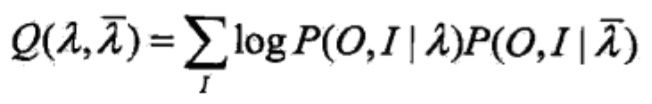代入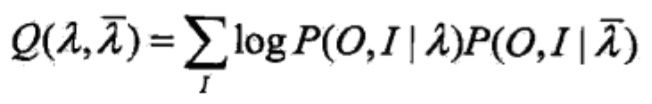后，将初始概率、转移概率、发射概率这三部分乘积的对数拆分为对数之和，所以有三项。

3 EM算法的M步:极大化Q函数$Q(\lambda,\bar{\lambda})$求模型参数$A,B,\pi$，由于要极大化的参数在Q函数表达式中单独地出现在3个项中，所以只需对各项分别极大化。

第1项可以写成：
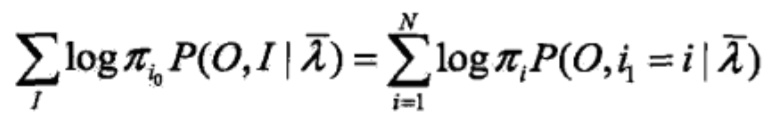
注意到$\pi_i$满足约束条件利用拉格朗日乘子法，写出拉格朗日函数：


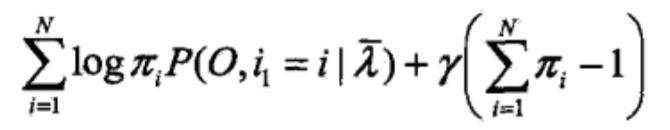

对其求偏导数并令结果为0
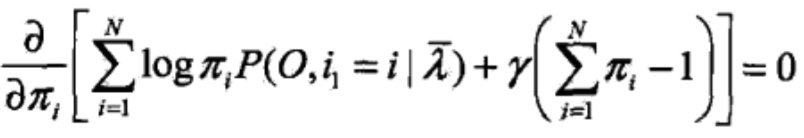

得到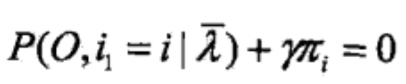


对i求和得到γ：
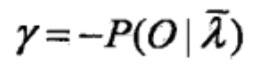

代入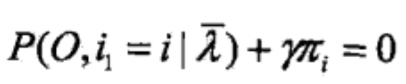中得到：

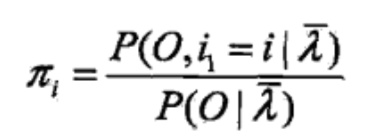

第2项可以写成：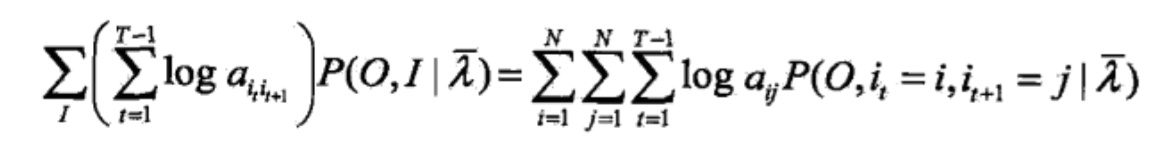

类似第1项，应用具有约束条件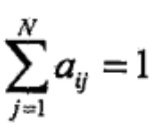

以求出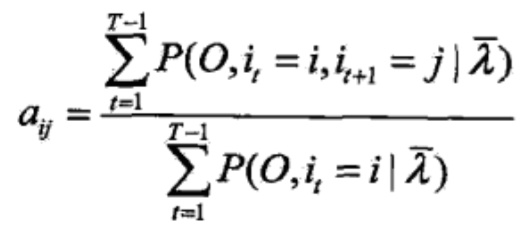

第3项为: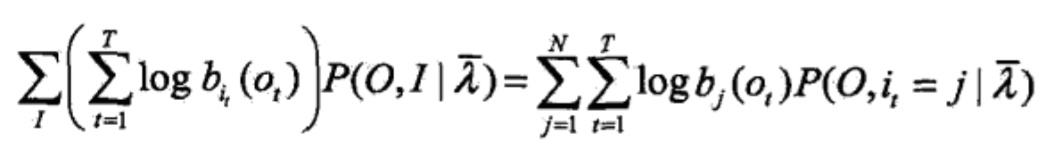

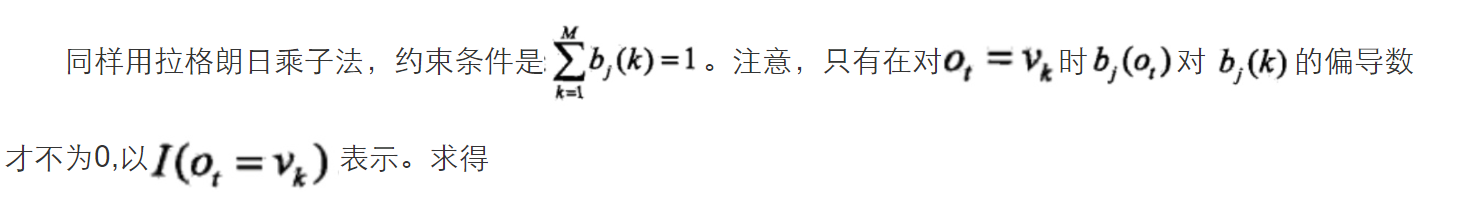

## Baum-Welch模型参数估计公式

将这三个式子中的各概率分别简写如下：

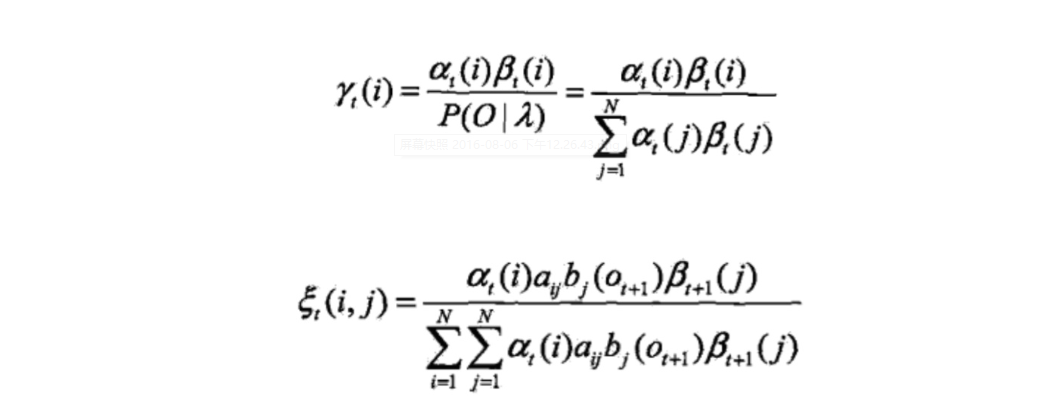

则可将相应的公式写成：
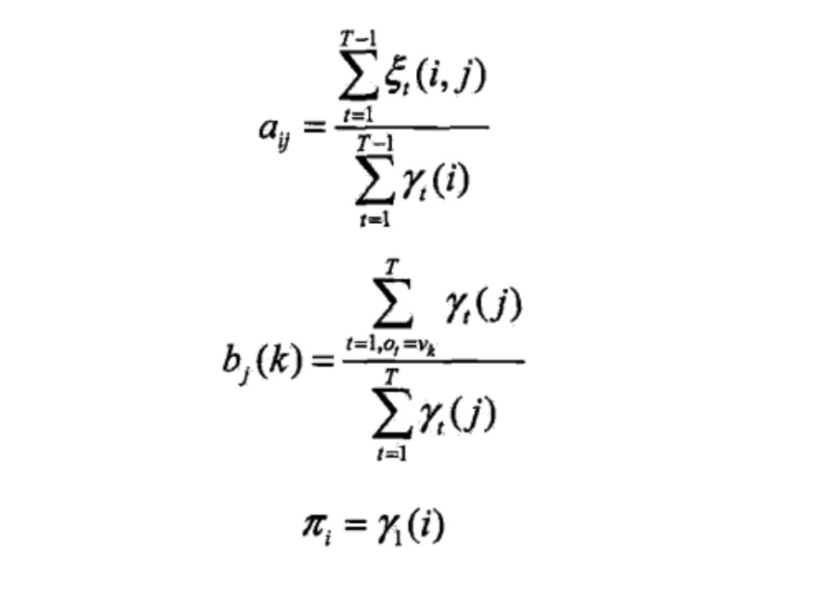

这三个表达式就是Baum-Welch算法（Baum-Welch algorithm)，它是EM算法在隐马尔可夫模型学习中的具体实现，由Baum和Welch提出。

## 算法 (Baum-Welch算法）

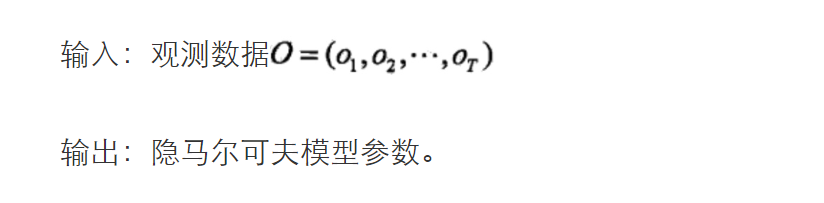

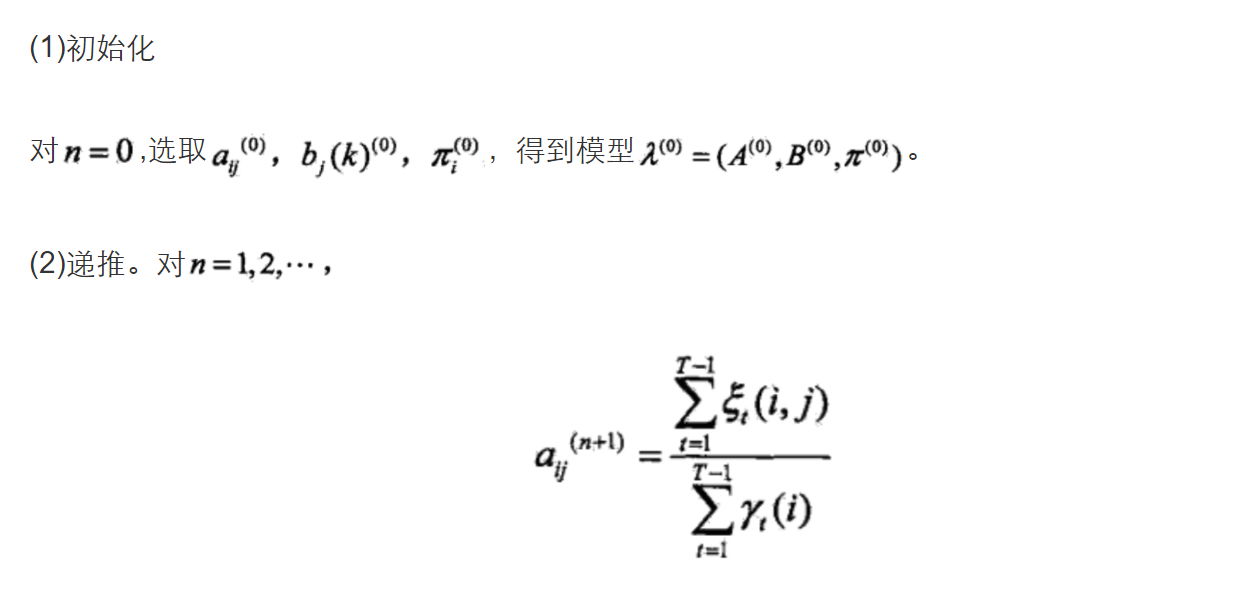

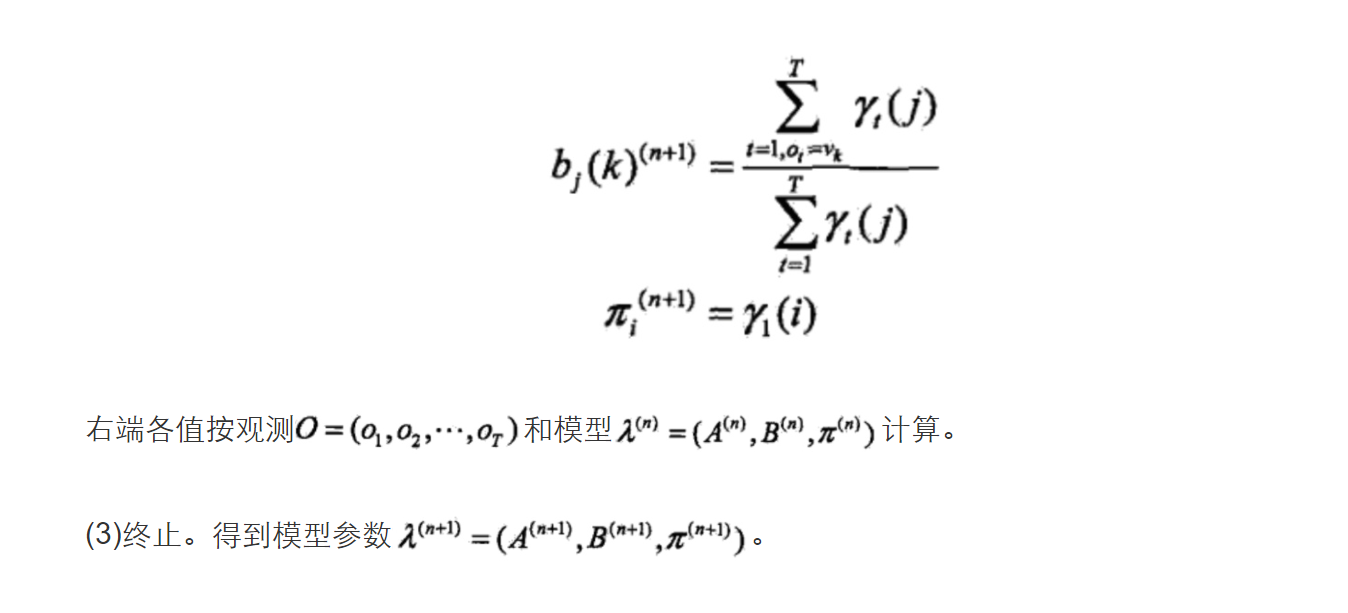

## Baum-Welch算法的Python实现

In [45]:
def baum_welch_train(self, observations, criterion=0.05):
    n_states = self.A.shape[0]
    n_samples = len(observations)
 
    done = False
    while not done:
        # alpha_t(i) = P(O_1 O_2 ... O_t, q_t = S_i | hmm)
        # Initialize alpha
        alpha = self._forward(observations)
 
        # beta_t(i) = P(O_t+1 O_t+2 ... O_T | q_t = S_i , hmm)
        # Initialize beta
        beta = self._backward(observations)
 
        xi = np.zeros((n_states,n_states,n_samples-1))
        for t in range(n_samples-1):
            denom = np.dot(np.dot(alpha[:,t].T, self.A) * self.B[:,observations[t+1]].T, beta[:,t+1])
            for i in range(n_states):
                numer = alpha[i,t] * self.A[i,:] * self.B[:,observations[t+1]].T * beta[:,t+1].T
                xi[i,:,t] = numer / denom
 
        # gamma_t(i) = P(q_t = S_i | O, hmm)
        gamma = np.sum(xi,axis=1)
        # Need final gamma element for new B
        prod =  (alpha[:,n_samples-1] * beta[:,n_samples-1]).reshape((-1,1))
        gamma = np.hstack((gamma,  prod / np.sum(prod))) #append one more to gamma!!!
 
        newpi = gamma[:,0]
        newA = np.sum(xi,2) / np.sum(gamma[:,:-1],axis=1).reshape((-1,1))
        newB = np.copy(self.B)
 
        num_levels = self.B.shape[1]
        sumgamma = np.sum(gamma,axis=1)
        for lev in range(num_levels):
            mask = observations == lev
            newB[:,lev] = np.sum(gamma[:,mask],axis=1) / sumgamma
 
        if np.max(abs(self.pi - newpi)) < criterion and \
                        np.max(abs(self.A - newA)) < criterion and \
                        np.max(abs(self.B - newB)) < criterion:
            done = 1
 
        self.A[:],self.B[:],self.pi[:] = newA,newB,newpi

先拿到前后向概率：

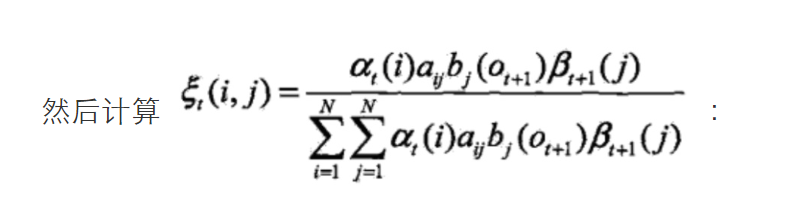

In [46]:
#xi = np.zeros((n_states,n_states,n_samples-1))
#for t in range(n_samples-1):
#    denom = np.dot(np.dot(alpha[:,t].T, self.A) * self.B[:,observations[t+1]].T, beta[:,t+1])
#    for i in range(n_states):
#       numer = alpha[i,t] * self.A[i,:] * self.B[:,observations[t+1]].T * beta[:,t+1].T
#       xi[i,:,t] = numer / denom

 #gamma_t(i) = P(q_t = S_i | O, hmm)
gamma = np.sum(xi,axis=1)
#Need final gamma element for new B 
prod =  (alpha[:,n_samples-1] * beta[:,n_samples-1]).reshape((-1,1))
gamma = np.hstack((gamma,  prod / np.sum(prod))) #append one more to gamma!!!

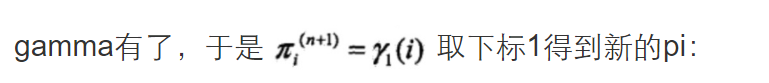

In [47]:
#newpi = gamma[:,0]

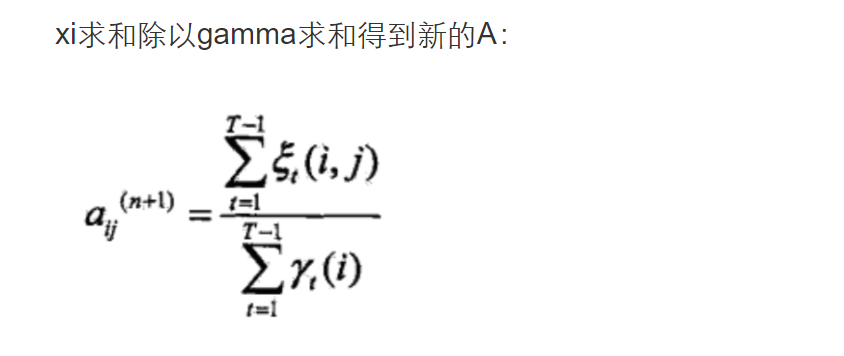

In [48]:
#newA = np.sum(xi,2) / np.sum(gamma[:,:-1],axis=1).reshape((-1,1))

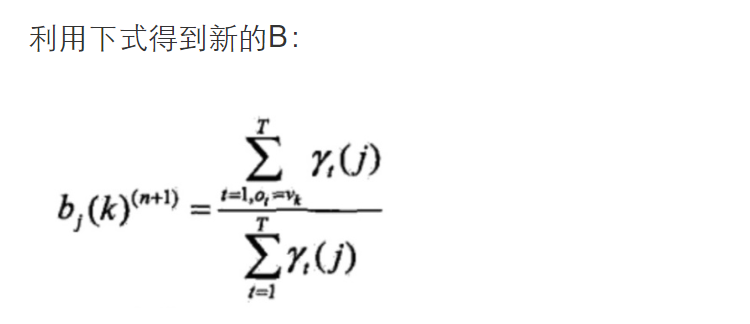

In [49]:
#num_levels = self.B.shape[1]
#sumgamma = np.sum(gamma,axis=1)
#for lev in range(num_levels):
#    mask = observations == lev
#   newB[:,lev] = np.sum(gamma[:,mask],axis=1) / sumgamma

接着检查是否满足终止阈值，否则继续下一轮训练。
我们可以用这样一串代码完成Baum-Welch算法的训练，并且评估其准确率：

## 预测算法

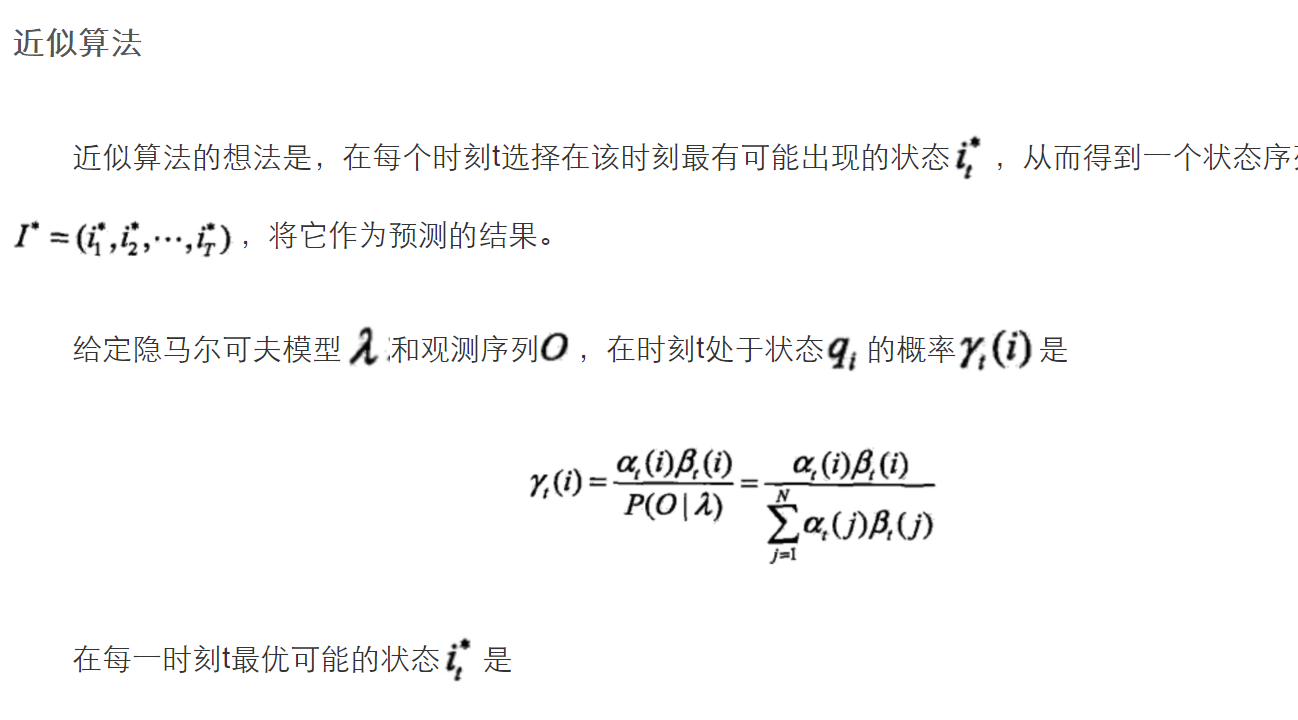

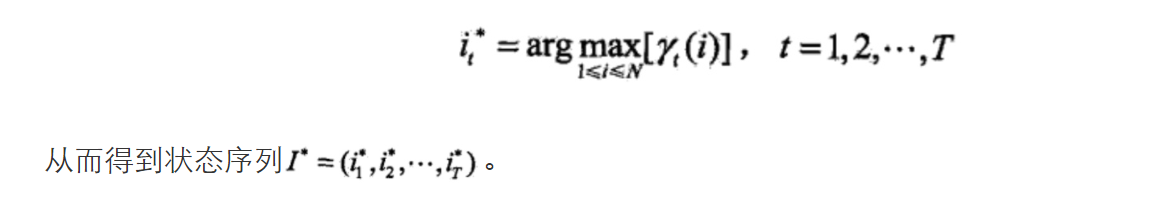

## 维特比算法

维特比算法实际是用动态规划解隐马尔可夫模型预测问题，即用动态规划(dynamic programming)求概率最大路径（最优路径）。这时一条路径对应着一个状态序列。

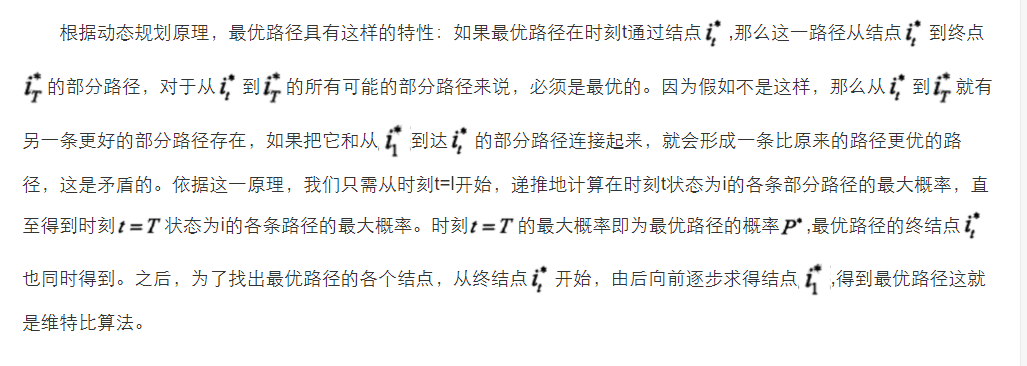

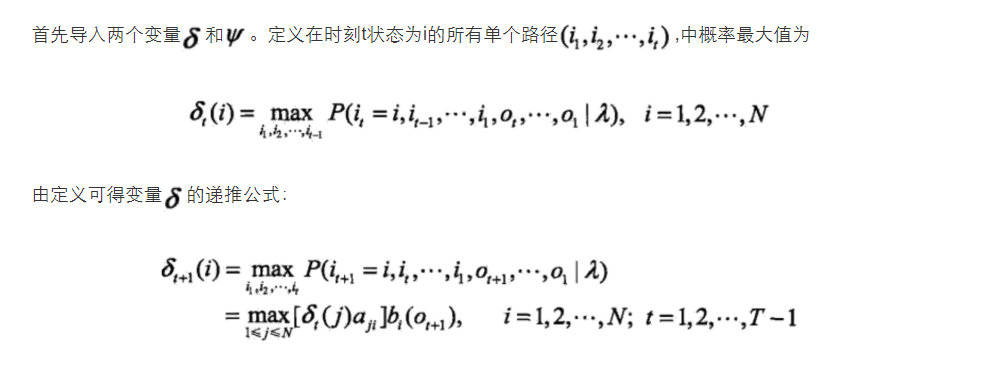

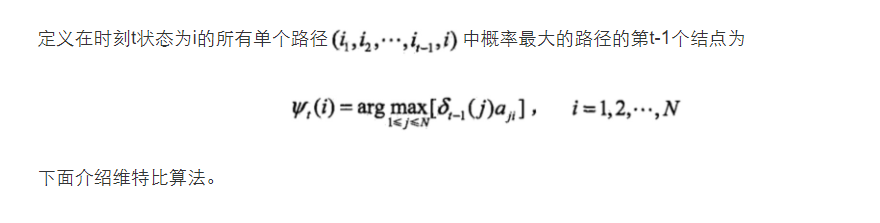

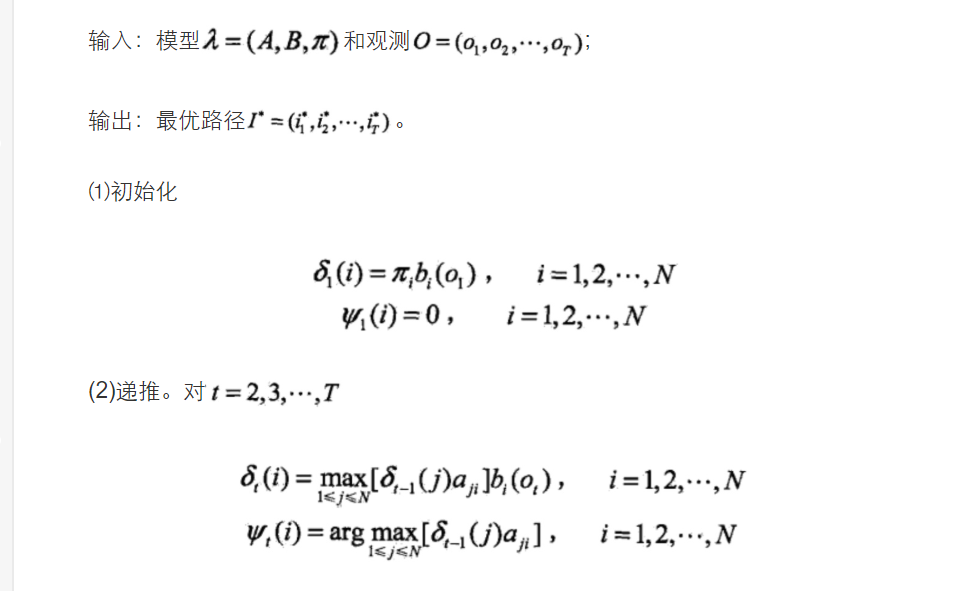

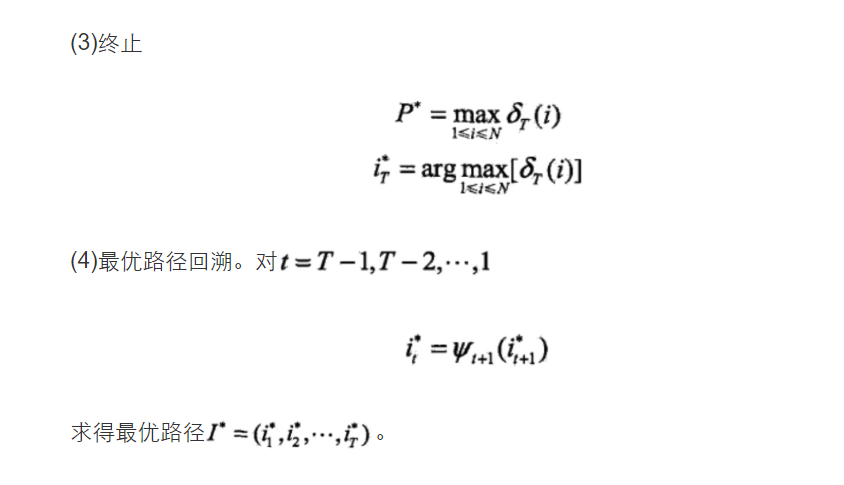

## 维特比算法Python实现

In [55]:
observations = ('normal', 'cold', 'dizzy')

In [56]:
def viterbi(self, obs_seq):
    """
    Returns
    -------
    V : numpy.ndarray
        V [s][t] = Maximum probability of an observation sequence ending
                   at time 't' with final state 's'
    prev : numpy.ndarray
        Contains a pointer to the previous state at t-1 that maximizes
        V[state][t]
    """
    N = self.A.shape[0]
    T = len(obs_seq)
    prev = np.zeros((T - 1, N), dtype=int)
 
    # DP matrix containing max likelihood of state at a given time
    V = np.zeros((N, T))
    V[:,0] = self.pi * self.B[:,obs_seq[0]]
 
    for t in range(1, T):
        for n in range(N):
            seq_probs = V[:,t-1] * self.A[:,n] * self.B[n, obs_seq[t]]
            prev[t-1,n] = np.argmax(seq_probs)
            V[n,t] = np.max(seq_probs)
 
    return V, prev

In [69]:
h = HMM(A, B, pi)
V, p = h.viterbi(observations_index)
print(" " * 7, " ".join(("%10s" % observations_index_label[i]) for i in observations_index))
for s in range(0, 2):
    print ("%7s: " % states_index_label[s] + " ".join("%10s" % ("%f" % v) for v in V[s]))
print ('\nThe most possible states and probability are:')
p, ss = h.state_path(observations_index)
for s in ss:
    print(states_index_label[s],end=",")
print (p)

                 1          0          0
Healthy:   0.300000   0.084000   0.005880
  Fever:   0.040000   0.027000   0.015120

The most possible states and probability are:
Healthy,Healthy,Fever,0.01512
